# Data Augmentation: Tests

In [1]:
import sys
sys.path.append('/home/jovyan/work/databases/HASY/')
from hasy_tools_updated import *

In [2]:
import numpy as np
import pandas as pd
import csv

In [3]:
# Trabajaremos solo con el conjunto de train.
csv_filepath='/home/jovyan/work/databases/HASY/benat-data/train.csv'
X_train, y_train, symbol_id2index_train, index2symbol_id_train = load_database(csv_filepath)

In [4]:
# Obtengamos el ID de cada instancia:
y_train_id = np.array([index2symbol_id_train[element] for element in y_train])

In [5]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,...,255.0,255.0,255.0,255.0,0.0,0.0,0.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134581,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
134582,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
134583,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
134584,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


### Imágenes originales:

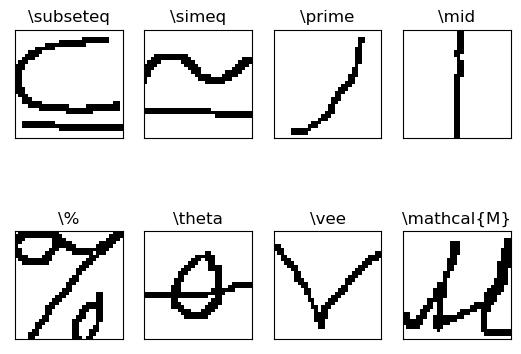

In [6]:
#rndm_elements = random.sample(range(len(y_test)),9)
a = random.randint(0,len(X_train)-8)
rndm_elements = list(range(a,a+8))
symbolid2latex = get_symbolid2latex()

for i,img in enumerate(rndm_elements,1):
    plt.subplot(240+i)
    plt.axis("on")
    plt.xticks([])  
    plt.yticks([]) 
    plt.title(f"{symbolid2latex[index2symbol_id_train[y_train[img]]]}")
    plt.imshow((X_train[img].reshape(32,32)), cmap='gray', interpolation='nearest')

## Crear variabilidad en las imágenes

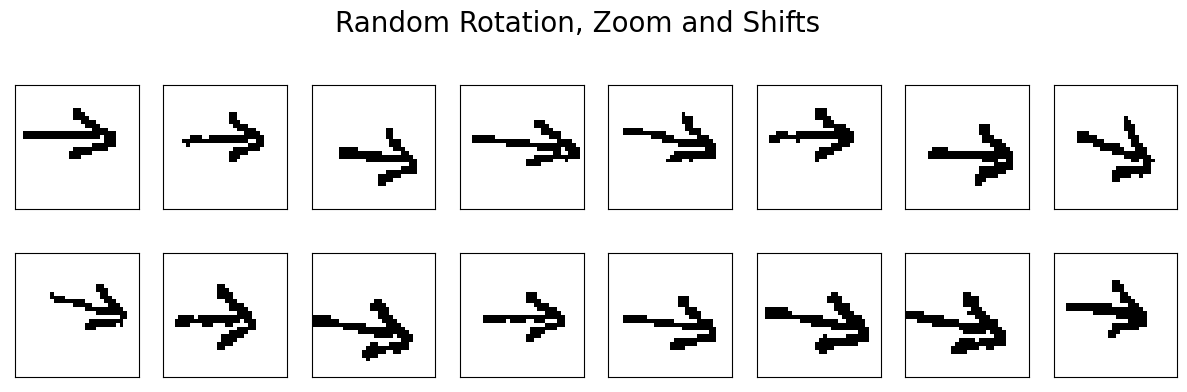

10 \rightarrow


In [18]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range = 10,           # 10 degrees
    zoom_range= [1.1,1.6],         # Zoom-out 50 %
    fill_mode= 'constant',         # edge pixels
    cval = 255.0,                  # white
    width_shift_range=0.15,
    height_shift_range=0.15,
    #shear_range=0.374,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function = lambda x: np.where(x<255.0, 0.0, 255.0) # To get only 0 or 255 outputs
)


img = 10 #= \rightarrow, 34 = \varphi

aug = datagen.flow(X_train[img].reshape(-1, 32, 32, 1))

# Plot using a for loop
fig, axes = plt.subplots(2, 8, figsize = (15, 4))
plt.suptitle('Random Rotation, Zoom and Shifts', fontsize=20, y=1.05)
axes = axes.ravel()

for i in range(16):
    aug_img = next(aug)[0]
    axes[i].imshow(aug_img, cmap = 'gray')
    axes[i].axis('on')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
plt.show()

print(img, symbolid2latex[index2symbol_id_train[y_train[img]]])

## Localizar las imágenes pertenecientes a cada clase

In [6]:
csv_filepath='/home/jovyan/work/databases/HASY/benat-data/train.csv'
data_dict = load_csv(csv_filepath)
dbc_dict = data_by_class(data_dict) 

In [10]:
dbc_dict[ list(dbc_dict.keys())[0] ][0:3]

[{'path': '/home/jovyan/work/databases/HASY/hasy-data/v2-08388.png',
  'symbol_id': '601',
  'latex': '\\approx',
  'user_id': '16925'},
 {'path': '/home/jovyan/work/databases/HASY/hasy-data/v2-91753.png',
  'symbol_id': '601',
  'latex': '\\approx',
  'user_id': '16925'},
 {'path': '/home/jovyan/work/databases/HASY/hasy-data/v2-91605.png',
  'symbol_id': '601',
  'latex': '\\approx',
  'user_id': '16925'}]

### Manera alternativa

Utilizando las matrices ya cargadas X_train e y_train, para no tener que andar cargando imágenes cada vez...

In [5]:
# Conjunto de IDs diferentes:
ID_list = np.array(list(set(y_train_id)))
ID_list.shape

(369,)

In [12]:
# List of indexes for a given category (ID):
X_clase_0 = X_train[y_train_id == ID_list[1]]
len(X_clase_0)

202

In [13]:
sum(y_train_id == ID_list[1])

202

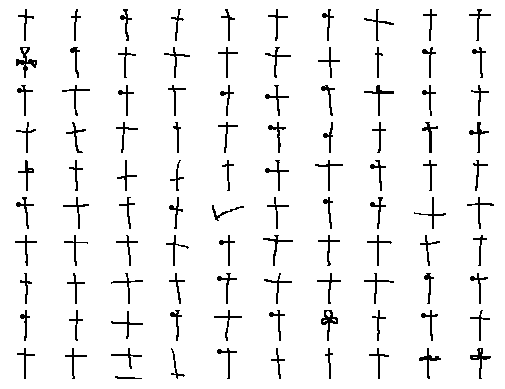

In [14]:
# Veamos si corresponden a la misma clase:
ID = 1
X_clase_0 = X_train[y_train_id == ID_list[ID]]
rndm_elements = random.sample(range(0,len(X_clase_0)), 100)

symbolid2latex = get_symbolid2latex()

for i,img in enumerate(rndm_elements,1):
    plt.subplot(10,10,0+i)
    plt.axis("off")
    plt.xticks([])  
    plt.yticks([]) 
    #plt.title(f"{symbolid2latex[ID_list[ID]]}")
    plt.imshow((X_clase_0[img].reshape(32,32)), cmap='gray', interpolation='nearest')

46


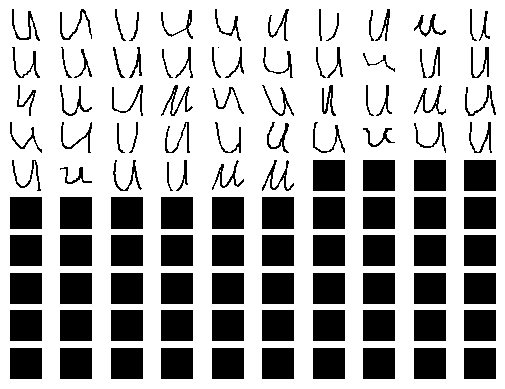

In [19]:
# Veamos si corresponden a la misma clase:
ID = 2
X_clase_0 = X_train[y_train_id == ID_list[ID]]
print(len(X_clase_0))

try: 
    rndm_elements = random.sample(range(0,len(X_clase_0)), 100)
except:
    while (len(X_clase_0)<100):
        X_clase_0 = np.append(X_clase_0, np.zeros((1,1024)),axis=0)
    rndm_elements = range(100)

symbolid2latex = get_symbolid2latex()

for i,img in enumerate(rndm_elements,1):
    plt.subplot(10,10,0+i)
    plt.axis("off")
    plt.xticks([])  
    plt.yticks([]) 
    #plt.title(f"{symbolid2latex[ID_list[ID]]}")
    plt.imshow((X_clase_0[img].reshape(32,32)), cmap='gray', interpolation='nearest')

264


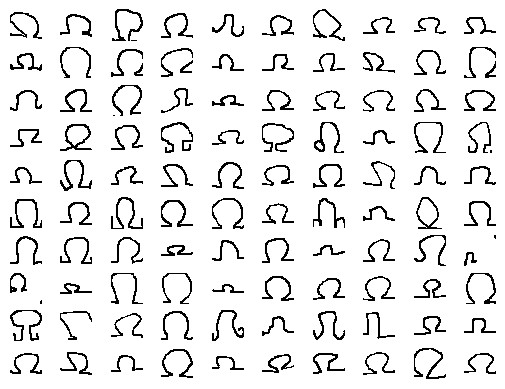

In [20]:
# Veamos si corresponden a la misma clase:
ID = 3
X_clase_0 = X_train[y_train_id == ID_list[ID]]
print(len(X_clase_0))

try: 
    rndm_elements = random.sample(range(0,len(X_clase_0)), 100)
except:
    while (len(X_clase_0)<100):
        X_clase_0 = np.append(X_clase_0, np.zeros((1,1024)),axis=0)
    rndm_elements = range(100)

symbolid2latex = get_symbolid2latex()

for i,img in enumerate(rndm_elements,1):
    plt.subplot(10,10,0+i)
    plt.axis("off")
    plt.xticks([])  
    plt.yticks([]) 
    #plt.title(f"{symbolid2latex[ID_list[ID]]}")
    plt.imshow((X_clase_0[img].reshape(32,32)), cmap='gray', interpolation='nearest')

Posible problema: se ve que hay símbolos que no están clasificados correctamente.

## Generación nuevas imágenes

In [6]:
%%time
from keras.preprocessing.image import ImageDataGenerator

# Desired amount of images per class:
n_total = 1000 

# Generate lists to store augmented data:
# Using np.arrays has been problematic.
X_aug = []
y_aug_id = []
X_len_old = len(X_aug)

datagen = ImageDataGenerator(
    rotation_range = 10,           # 10 degrees
    zoom_range= [1.1,1.6],         # Zoom-out 50 %
    fill_mode= 'constant',         # edge pixels
    cval = 255.0,                  # white
    width_shift_range=0.15,
    height_shift_range=0.15,
    #shear_range=0.374,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function = lambda x: np.where(x<255.0, 0.0, 255.0) # To get only 0 or 255 outputs
)

for (k, ID) in enumerate(ID_list):
    print(f"Current ID: {ID:4} - {k+1:3}/{369}")
    original_images = X_train[y_train_id == ID]
    n_original = len(original_images)
    n_needed = n_total - n_original # Amount of images that needs to be generated.
    
    if (n_needed<=0):
        # No need to generate images.
        print("This class has enough images. No new images will be generated.")
        X_aug.extend(random.sample(original_images.tolist(),n_total)) # choose n_total images randomly.
        y_aug_id.extend([ID]*n_total)
    
    else:
        # Add original images.
        X_aug.extend(original_images.tolist())
        y_aug_id.extend([ID]*n_original)
        print("Amount of images to be generated: ", n_needed)
        for i in range(0,n_needed):
            image = original_images[i % n_original]
            aug = datagen.flow(image.reshape(-1, 32, 32, 1))
            aug_image = next(aug)[0].reshape(1024)
            X_aug.append(list(aug_image))
            y_aug_id.append(ID)
    
    X_len = len(X_aug)
    print(f"{X_len-X_len_old} images have been added to the set.", end=2*"\n")
    X_len_old = X_len
        
    
print("--------------------------------------------------------------")

2024-04-19 09:31:10.055915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 09:31:11.418730: E tensorflow/tsl/lib/monitoring/collection_registry.cc:81] Cannot register 2 metrics with the same name: /tensorflow/core/bfc_allocator_delay


Current ID: 190  -   1/369
Amount of images to be generated:  671
1000 images have been added to the set.

Current ID: 263  -   2/369
Amount of images to be generated:  798
1000 images have been added to the set.

Current ID: 110  -   3/369
Amount of images to be generated:  954
1000 images have been added to the set.

Current ID: 1103 -   4/369
Amount of images to be generated:  736
1000 images have been added to the set.

Current ID: 1000 -   5/369
Amount of images to be generated:  806
1000 images have been added to the set.

Current ID: 1117 -   6/369
Amount of images to be generated:  919
1000 images have been added to the set.

Current ID: 1315 -   7/369
Amount of images to be generated:  959
1000 images have been added to the set.

Current ID: 38   -   8/369
Amount of images to be generated:  949
1000 images have been added to the set.

Current ID: 153  -   9/369
Amount of images to be generated:  302
1000 images have been added to the set.

Current ID: 886  -  10/369
Amount of 

In [7]:
len(X_aug)

369000

In [8]:
len(y_aug_id)

369000

In [9]:
# Convert to np.arrays()
X_aug = np.array(X_aug)
y_aug_id = np.array(y_aug_id)

# Shuffle arrays:
shuffle_idx = np.random.permutation(len(X_aug))
X_aug = X_aug[shuffle_idx]
y_aug_id = y_aug_id[shuffle_idx]


expected_size = len(ID_list)*n_total
print(f"Expected shapes: X_aug={(expected_size,1024)} and y_aug_id={expected_size}")
print(f"Actual shapes: X_aug={X_aug.shape} and y_aug_id={y_aug_id.shape}")
print("--------------------------------------------------------------\n")

print("Saving arrays to csv...")
np.savetxt("X_aug.csv", X_aug, fmt="%d", delimiter = ",")
np.savetxt("y_aug_id.csv", y_aug_id, fmt="%s", delimiter = ",")
print("Csv-s created. Data augmentation process finished.")

Expected shapes: X_aug=(369000, 1024) and y_aug_id=369000
Actual shapes: X_aug=(369000, 1024) and y_aug_id=(369000,)
--------------------------------------------------------------

Saving arrays to csv...
Csv-s created. Data augmentation process finished.


### Pruebas para buscar el método más rápido para crear el archivo csv

In [563]:
from time import time

In [569]:
ti=time()
iters=20
for i in range(iters):
    # create a dummy array 
    arr = np.arange(0,1000000).reshape(1000,1000) 
    # convert array into dataframe 
    DF = pd.DataFrame(arr) 
    # save the dataframe as a csv file 
    DF.to_csv("data1.csv", header=False, index=False)

print(f"Average time needed for METHOD1: {1000*(time()-ti)/iters} ms")

Average time needed for METHOD1: 324.6545433998108 ms


In [571]:
ti=time()
iters=20
for i in range(iters):
    arr = np.arange(0,1000000).reshape(1000,1000) 
    # save array into csv file 
    np.savetxt("data3.csv", arr, fmt="%d", delimiter = ",")

print(f"Average time needed for METHOD2: {1000*(time()-ti)/iters} ms")

Average time needed for METHOD2: 241.14304780960083 ms


Se utilizará el segundo método.

## Comprobación de las imágenes generadas

In [ ]:
%%time
#Load data:
X_aug_read = np.loadtxt("X_aug.csv", delimiter=",")
y_aug_id_read = np.loadtxt("y_aug_id.csv", delimiter=",", dtype=str)

In [ ]:
%%time
# Plot data:
rndm_elements = random.randint(0,len(X_aug_read))

for i,img in enumerate(range(rndm_elements,rndm_elements+100),1):
    plt.subplot(10,10,0+i)
    plt.axis("off")
    plt.imshow((X_aug_read[img].reshape(32,32)), cmap='gray', interpolation='nearest')

Test: faster way to load all the data?

Check `load_csv()` in `hasy_tools_updated.py`

In [608]:
%%time
X_aug_read2 = load_csv("X_aug.csv", delimiter=",")

CPU times: user 2min 30s, sys: 6.99 s, total: 2min 37s
Wall time: 2min 37s


¡Funciona peor! Nos quedamos con la primera opción: `np.loadtxt`

### Concatenar datos originales y datos generados

In [609]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[4,5,6]])

In [615]:
X_all = np.concatenate((X_train, X_aug), axis=0)

In [616]:
y_all = np.concatenate((y_train_id, y_aug_id), axis=0)

In [617]:
# Check size:
X_all.shape, y_all.shape

((1037259, 1024), (1037259,))

In [619]:
X_train.shape, y_train_id.shape

((134586, 1024), (134586,))

In [618]:
# Desired amount of images per class:
n_total = 2811 
# Number of classes:
n_classes = 369
# Expected total:
print("Total data lines: ", n_total*n_classes)

Total data lines:  1037259


In [623]:
len(y_all)

1037259